In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import scipy.signal as signal

In [7]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        obj = data[data.find('{') : data.rfind('}')+1]
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data
    return []

In [8]:
file_dir = os.getcwd() + "/Assignment02/"
file_neg = os.listdir(file_dir + "negative")
file_pos = os.listdir(file_dir + "positive")
file_unclassified = os.listdir(file_dir + "unclassified")


In [7]:
def iterhdbscan(df):
    count = 0
    clusterer = hdbscan.HDBSCAN(gen_min_span_tree=True)
    clusterer.fit(df)
    for i in range(len(clusterer.probabilities_)):
        if clusterer.probabilities_[i] == 0:
            count +=1
            df.drop(i, inplace=True)
    return count

In [24]:
def savgol_filter(df):
    y_smooth = signal.savgol_filter(df[0], window_length=11, polyorder=3, mode="mirror")
    df[0] = y_smooth
    return df


## Negative Data 

In [29]:
## Negative Data #Dropping of white noise found through the iteration of all the negative files
count = 0
total = 0 
for i in range(len(file_neg)):
    df_neg = load_waveform(file_dir + "negative/" + file_neg[i])
    total += len(df_neg)
    noise= savgol_filter(df_neg)
    df_neg.to_csv(os.getcwd() + "/Cleansed/negative/" + file_neg[i][:-3] + ".csv")

In [17]:
# file_neg[i][:-3]
print(os.getcwd() + "/Cleansed/negative/" + file_neg[i][:-3] + ".csv")

/Users/jurgentan/Desktop/School/Machine Learning/Assignment 2/Cleansed/negative/1029777.csv


## Positive Data 

In [30]:
#Dropping of white noise found through the iteration of all the negative files
count = 0
total = 0 
for i in range(len(file_pos)):
    df_pos = load_waveform(file_dir + "positive/" + file_pos[i])
    total += len(df_pos)
    noise= savgol_filter(df_pos)
    df_pos.to_csv(os.getcwd() + "/Cleansed/positive/" + file_pos[i][:-3] + ".csv")


                0         1        2          3       4       5
0      447.831492  276947.0  13831.0  2423855.0  1605.0  1816.0
1      442.785501  158229.0  12612.0  2423883.0  1059.0  2171.0
2      430.971399  144577.0  13376.0  2423894.0  1574.0  1619.0
3      414.543473  180726.0  12636.0  2423906.0  1261.0  2201.0
4      392.590909  150786.0  12682.0  2423914.0  1549.0  3426.0
...           ...       ...      ...        ...     ...     ...
12210         NaN       NaN      NaN        NaN     NaN     NaN
12211         NaN       NaN      NaN        NaN     NaN     NaN
12212         NaN       NaN      NaN        NaN     NaN     NaN
12213         NaN       NaN      NaN        NaN     NaN     NaN
12214         NaN       NaN      NaN        NaN     NaN     NaN

[12215 rows x 6 columns]


## Unclassified Data 

In [32]:
#Dropping of white noise found through the iteration of all the negative files
count = 0
total = 0 
for i in range(len(file_unclassified)):
    df_unclassified = load_waveform(file_dir + "unclassified/" + file_unclassified[i])
    total += len(df_unclassified)
    noise= savgol_filter(df_unclassified)
    df_pos.to_csv(os.getcwd() + "/Cleansed/unclassified/" + file_unclassified[i][:-3] + ".csv")


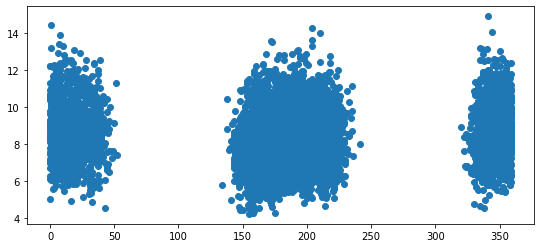

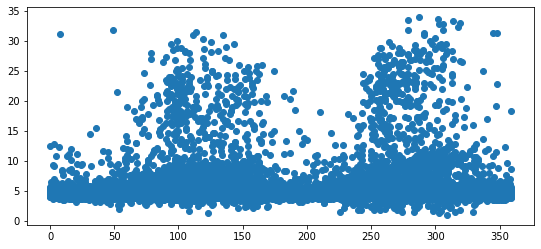

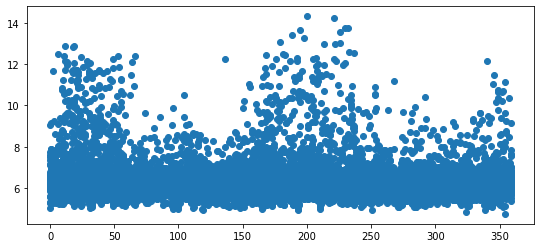

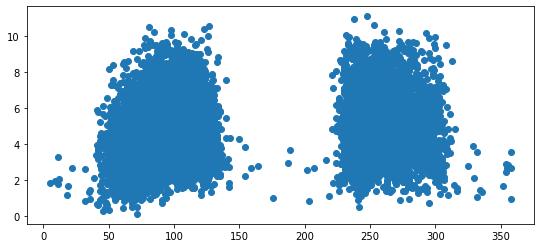

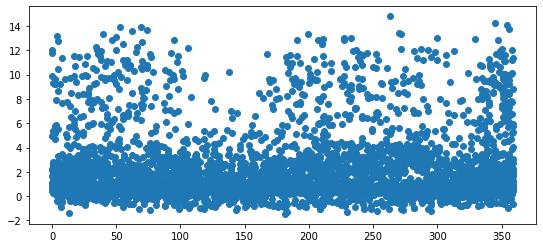

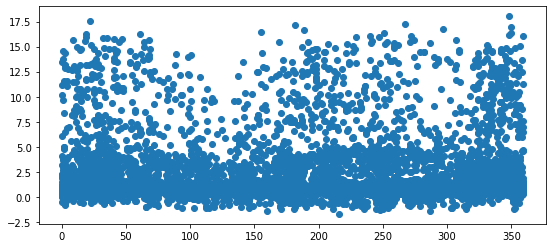

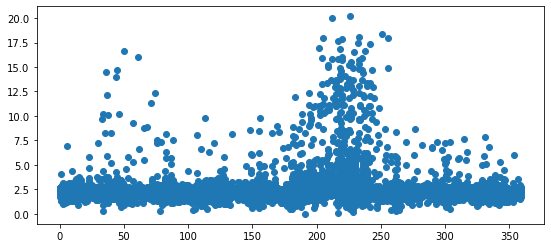

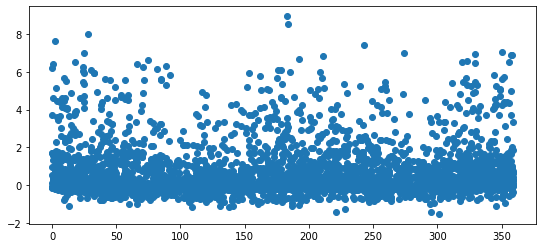

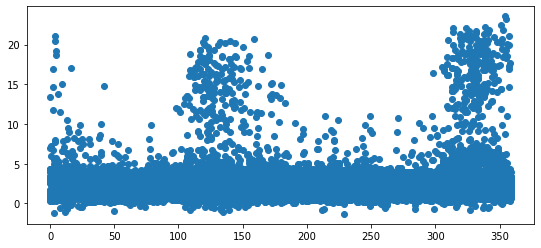

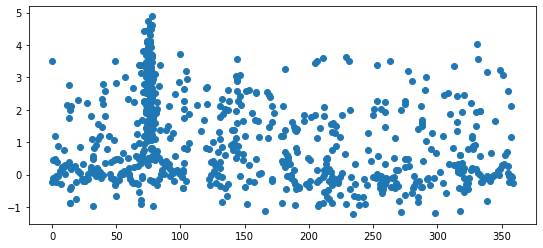

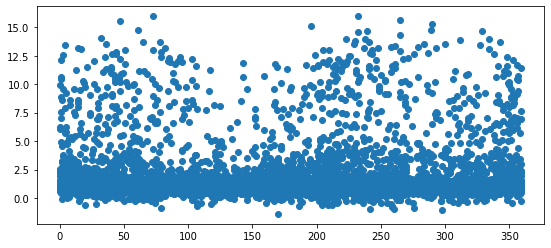

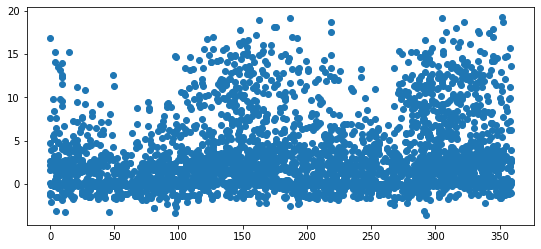

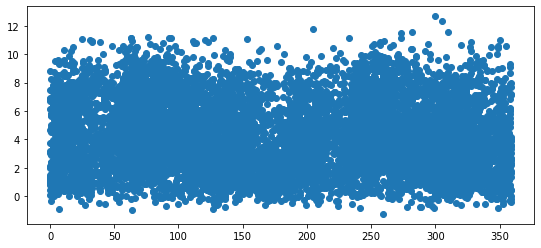

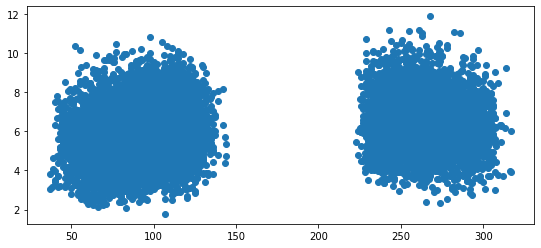

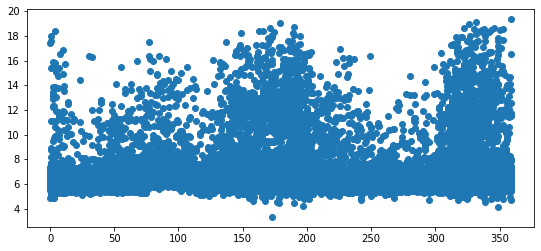

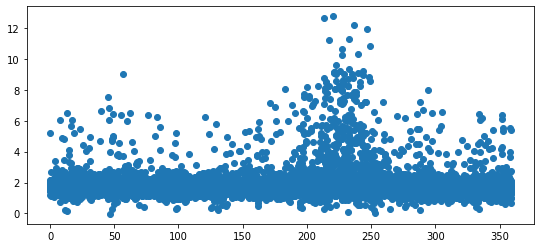

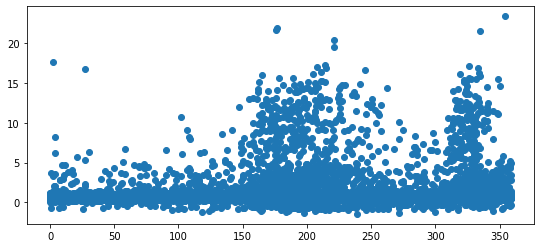

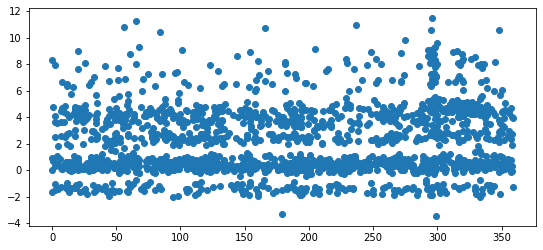

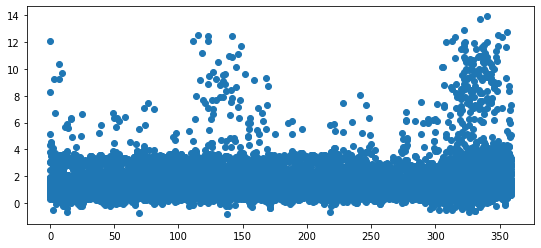

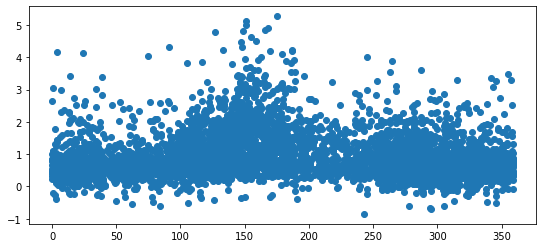

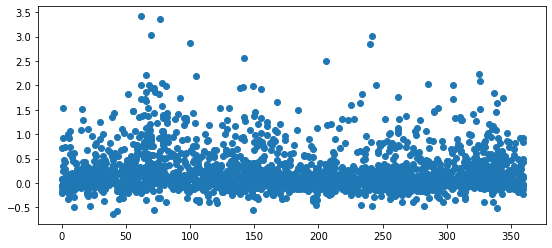

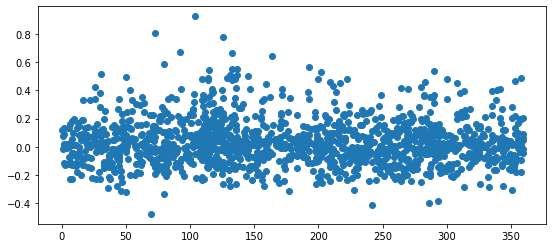

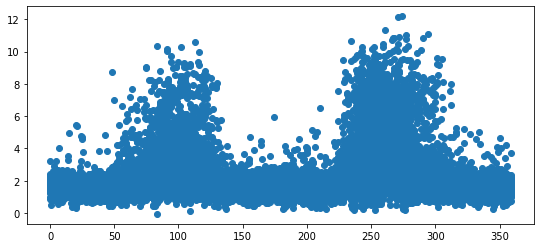

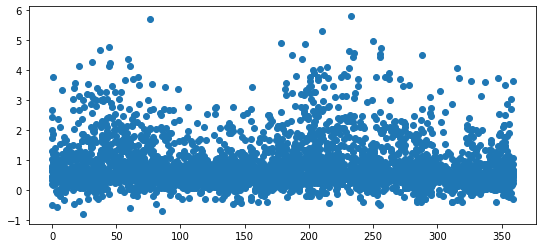

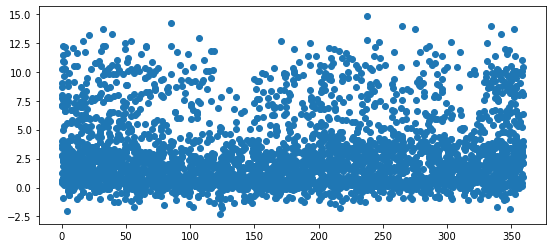

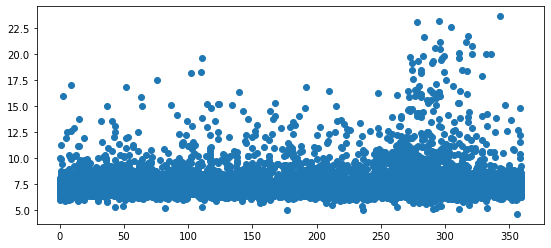

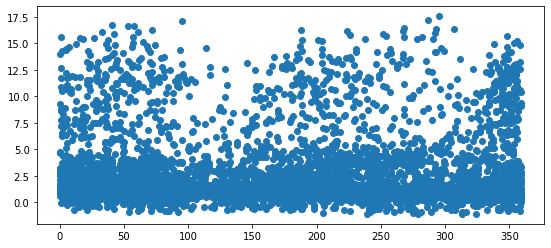

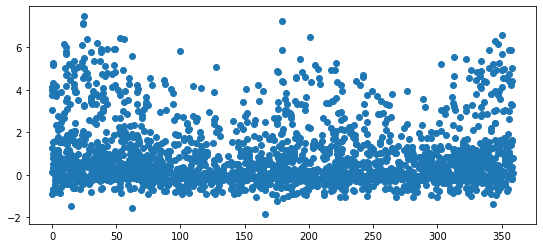

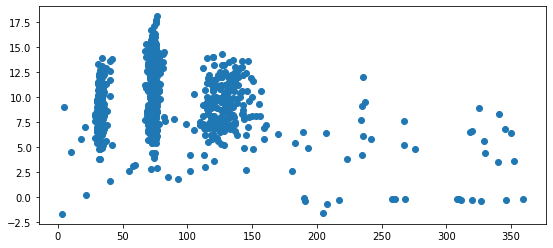

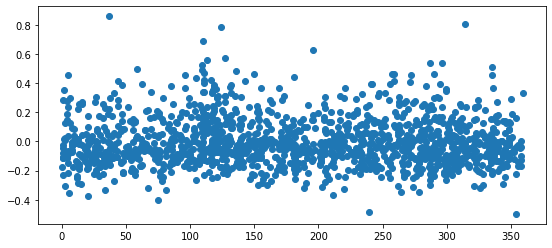

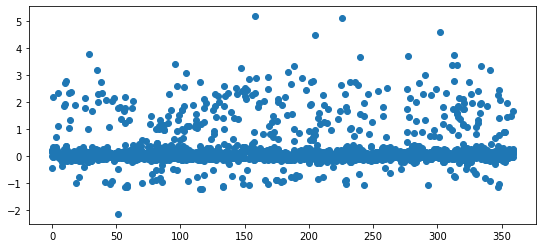

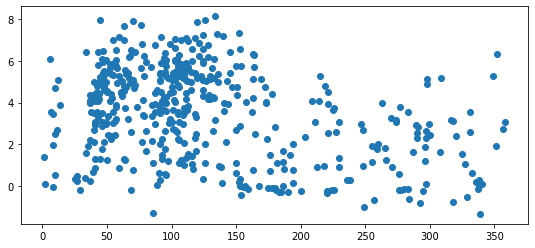

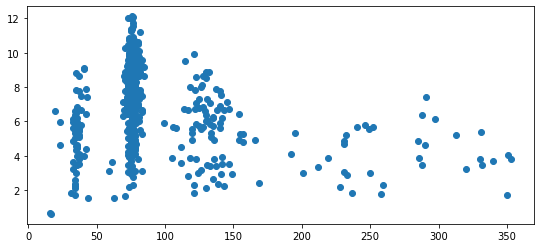

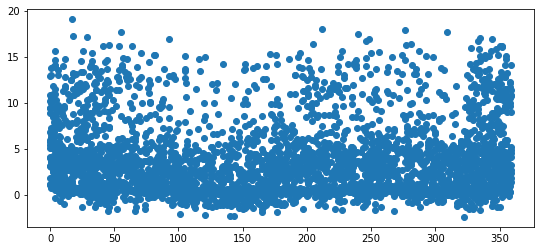

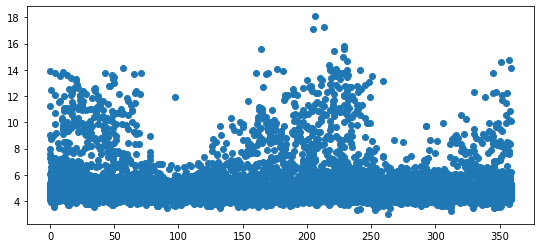

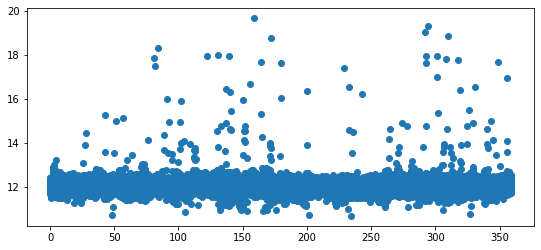

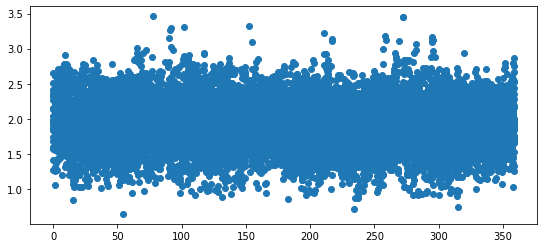

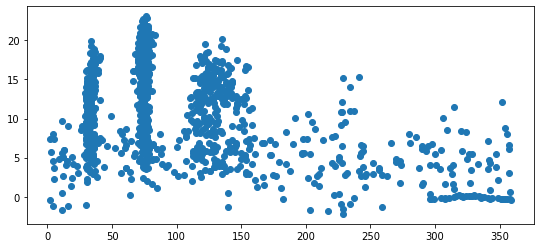

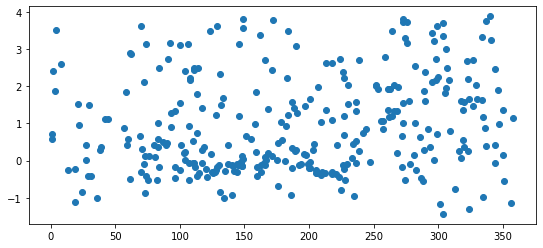

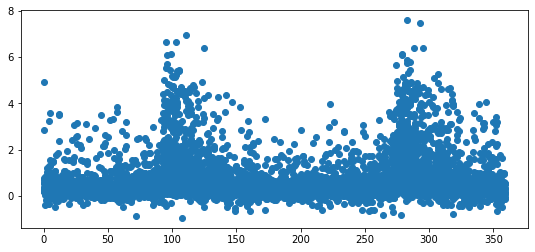

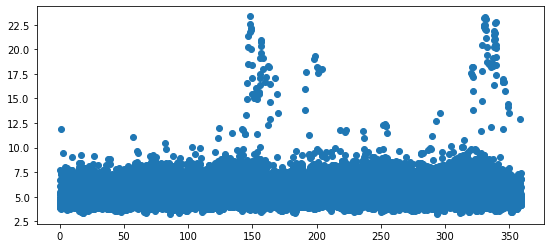

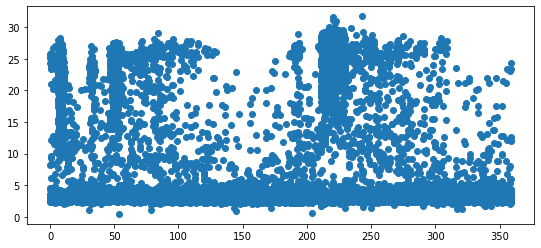

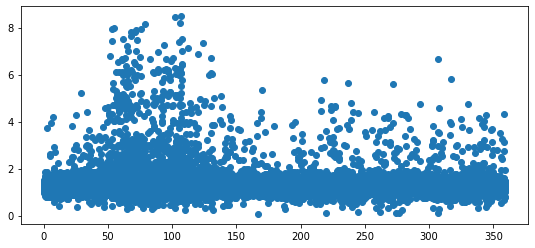

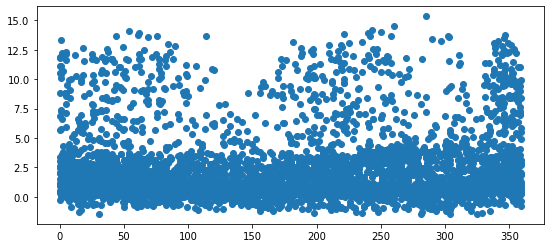

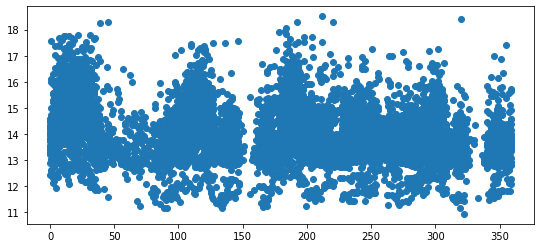

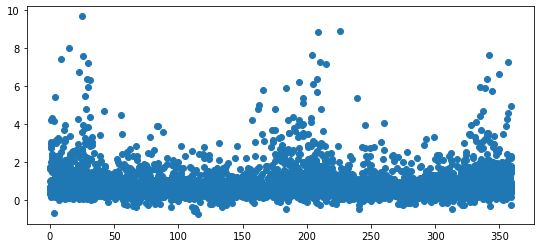

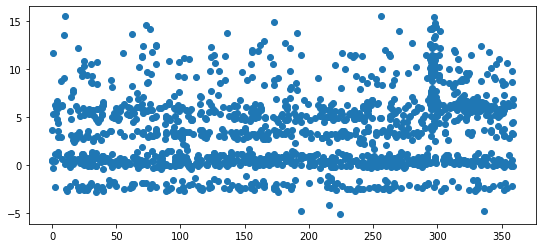

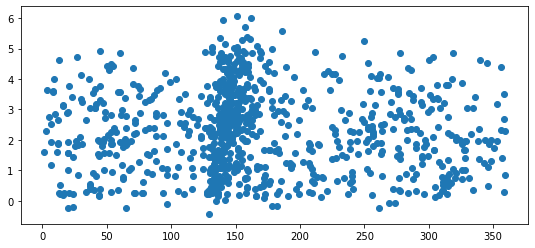

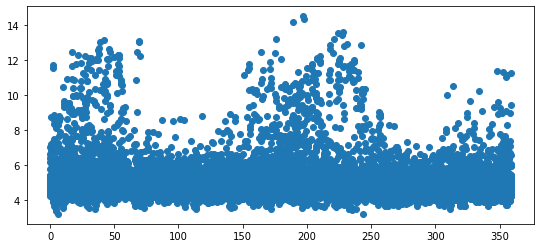

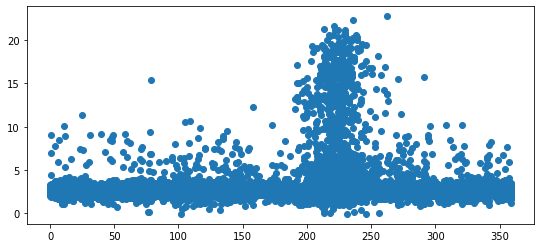

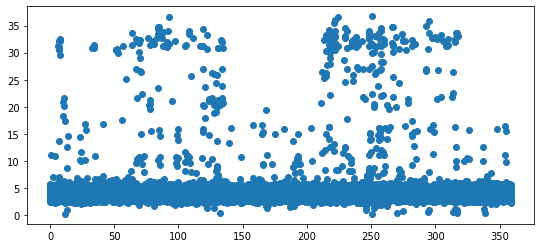

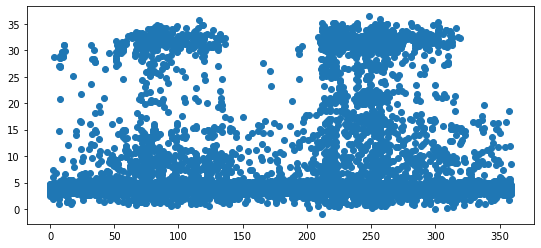

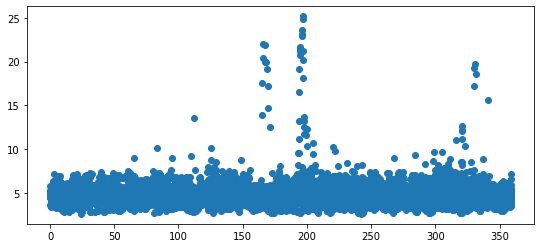

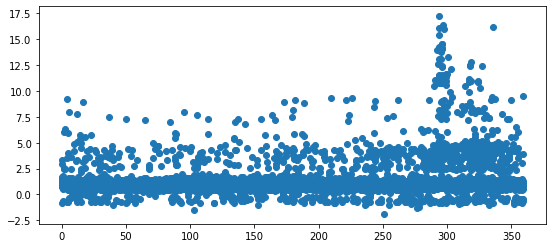

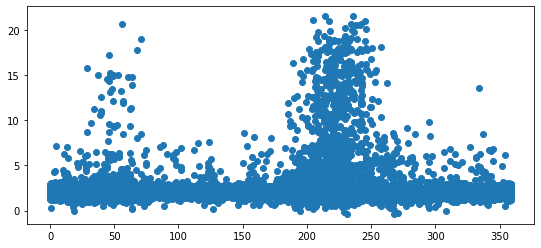

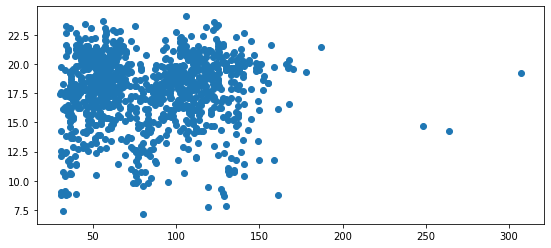

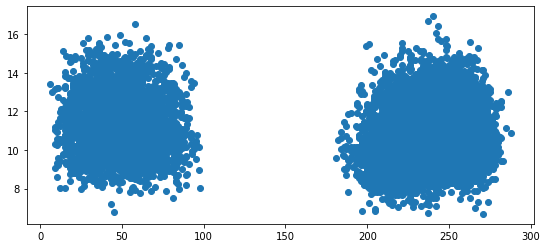

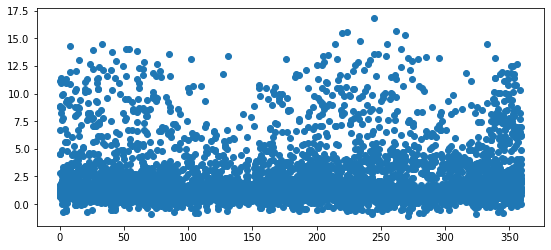

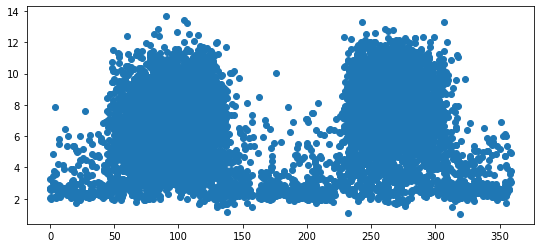

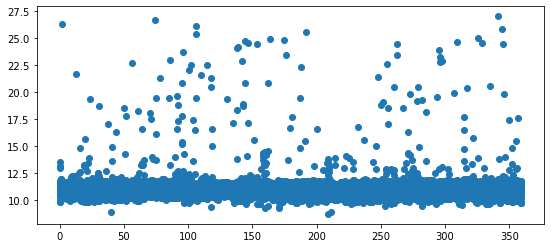

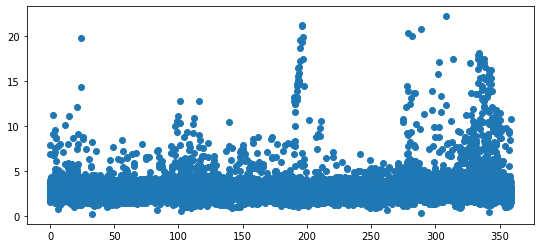

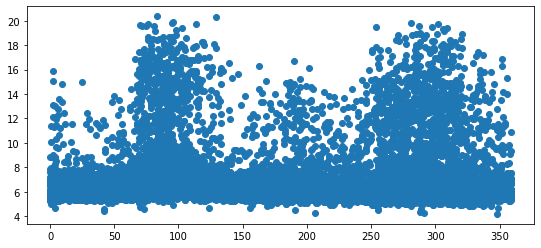

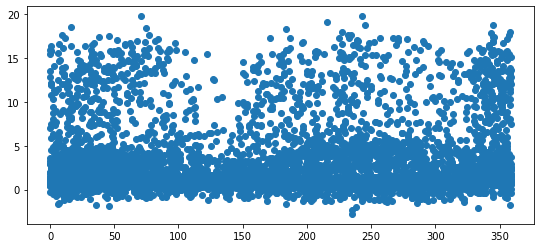

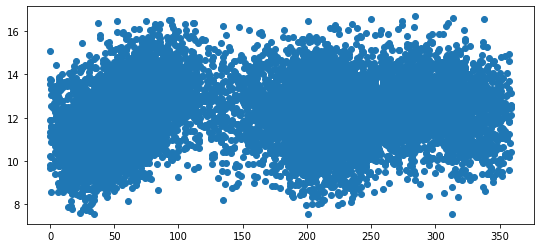

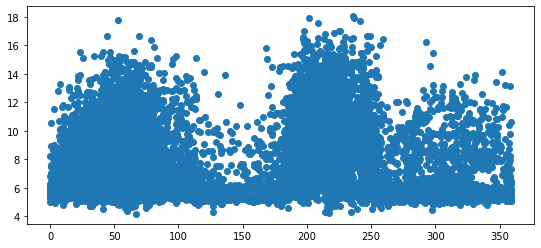

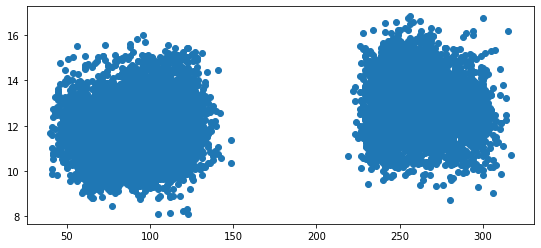

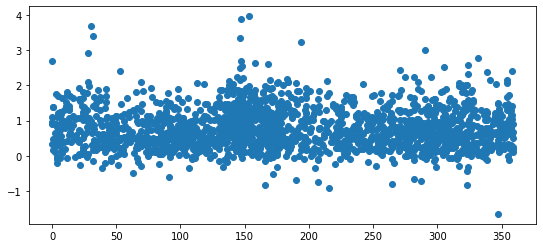

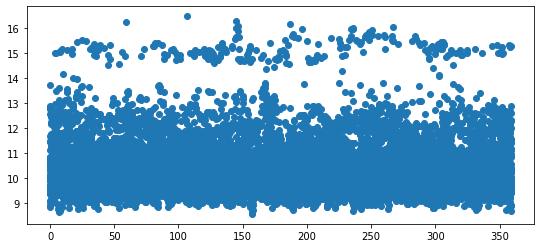

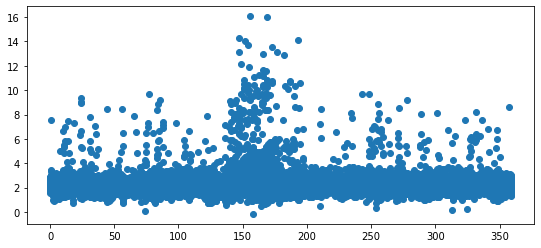

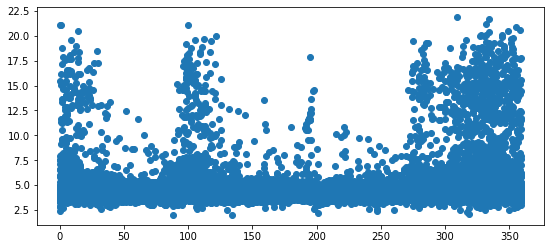

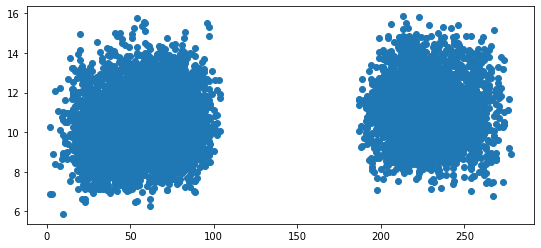

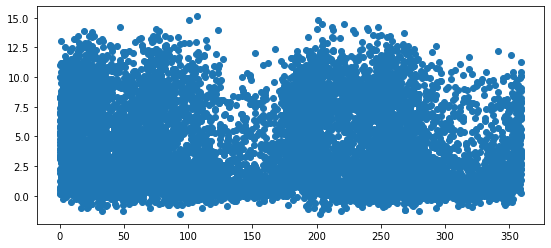

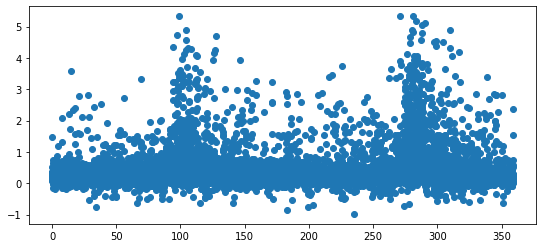

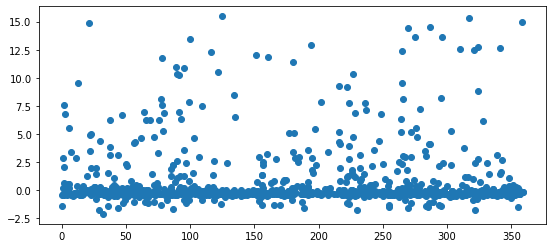

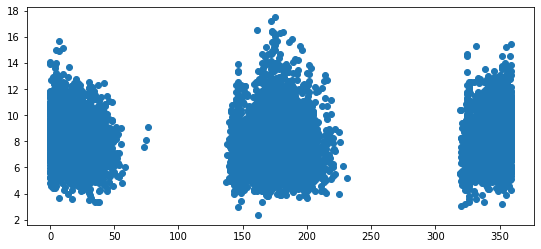

In [39]:
filepaths = []
directory = os.getcwd() + '/Cleansed/positive'

for filename in os.listdir(directory):
    f = os.path.join(filename)
    if(f!=".config" and f!=".ipynb_checkpoints"):
        filepaths.append(f)
#         print(f)
for filepath in filepaths:
        waveform = pd.read_csv(directory + "/" + filepath, index_col=0)
        
        fig = plt.figure()
        fig.set_figwidth(20)

        plt_1 = plt.subplot(1, 2, 1)
        plt.plot(waveform['2'], waveform['0'], 'o')
#         plt.title(label=filepath + "("+str(count)+")", fontdict=None, loc='center', pad=None)
        plt.show()
#         plt.savefig(filepath+".jpeg")

#         count+=1
#         print("saved" + filepath)

plt.close()

In [31]:
waveform

,0,1,2,3,4,5
0,8.808275,892,144,51075,0,0
1,8.277389,-1342,153,51075,0,0
2,9.764569,2801,172,51075,0,0
3,10.829254,3886,175,51075,1,3
4,11.215035,7020,181,51075,3,12
...,...,...,...,...,...,...
12171,9.465035,1680,0,51571,1,1
12172,7.347902,1177,5,51572,0,0
12173,6.453380,-908,11,51572,0,0
12174,4.183566,1559,24,51572,0,0
